<a href="https://colab.research.google.com/github/gabrielutomo/Youtube-Music-Hits/blob/main/Naive%20Bayes%20UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

view_class
sedang    58
tinggi    27
rendah    15
Name: count, dtype: int64
Model berhasil dilatih!

=== AKURASI ===
65.0 %

=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

      rendah       0.33      1.00      0.50         1
      sedang       0.90      0.64      0.75        14
      tinggi       0.43      0.60      0.50         5

    accuracy                           0.65        20
   macro avg       0.55      0.75      0.58        20
weighted avg       0.75      0.65      0.68        20



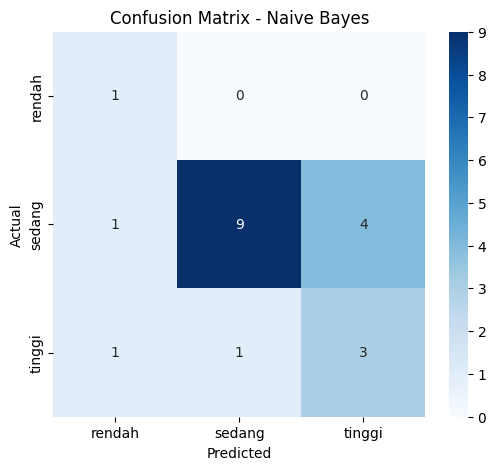

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ==========================
# 1. LOAD DATA
# ==========================
data = pd.read_csv('/content/youtube-top-100-songs-2025.csv') # Assuming data is in 'data.csv'
df = data.copy()

# ==========================
# 2. LABELKAN VIEW COUNT MENJADI KATEGORI
# ==========================
def categorize_view(v):
    if v < 1_000_000:
        return "rendah"
    elif v < 100_000_000:
        return "sedang"
    else:
        return "tinggi"

df['view_class'] = df['view_count'].apply(categorize_view)

print(df['view_class'].value_counts())

# ==========================
# 3. PILIH FITUR
# ==========================
X = df[['categories', 'duration', 'tags', 'channel']]
y = df['view_class']

# ==========================
# 4. ONE-HOT ENCODING
# ==========================
categorical_features = ['categories', 'tags', 'channel']
transformer = ColumnTransformer(
    [('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough'
)

X_encoded = transformer.fit_transform(X)

# ==========================
# 5. NORMALISASI
# ==========================
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X_encoded)

# ==========================
# 6. TRAIN-TEST SPLIT
# ==========================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# ==========================
# 7. TRAIN NAIVE BAYES
# ==========================
model = GaussianNB()
model.fit(X_train.toarray(), y_train)

print("Model berhasil dilatih!")

# ==========================
# 8. PREDIKSI
# ==========================
y_pred = model.predict(X_test.toarray())

# ==========================
# 9. EVALUASI
# ==========================
print("\n=== AKURASI ===")
print(accuracy_score(y_test, y_pred) * 100, "%")

print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred))

# ==========================
# 10. CONFUSION MATRIX
# ==========================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap="Blues",
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

In [4]:
# ==================================
# 12. MANUAL PREDICTION DENGAN INPUT OTOMATIS
# ==================================

# @markdown Masukkan nilai untuk fitur prediksi manual:
manual_categories = 'Music' #@param ['Music', 'Gaming', 'Film & Animation', 'Sports', 'Entertainment', 'News & Politics', 'Comedy', 'Howto & Style', 'Science & Technology', 'Education', 'Pets & Animals', 'Travel & Events', 'Autos & Vehicles']
manual_duration = 250 #@param {type:"integer"}
manual_tags = 'Pop;Trending' #@param {type:"string"}
manual_channel = 'ExampleChannel' #@param {type:"string"}

# Define a new input data point using the manual inputs
new_data_auto = pd.DataFrame({
    'categories': [manual_categories],
    'duration': [manual_duration],
    'tags': [manual_tags],
    'channel': [manual_channel]
})

print("Input data for prediction:")
print(new_data_auto)

# Apply the same one-hot encoding transformer
X_new_encoded_auto = transformer.transform(new_data_auto)

# Apply the same StandardScaler
X_new_scaled_auto = scaler.transform(X_new_encoded_auto)

# Make a prediction using the trained model
new_prediction_auto = model.predict(X_new_scaled_auto.toarray())

print(f"\nPredicted view class for the new input: {new_prediction_auto[0]}")

Input data for prediction:
  categories  duration          tags         channel
0      Music       250  Pop;Trending  ExampleChannel

Predicted view class for the new input: rendah
